# Loading the minst data


In [2]:

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

# Exploring the data

In [4]:
X, y = mnist.data, mnist.target


In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
X.shape

(70000, 784)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y.shape

(70000,)

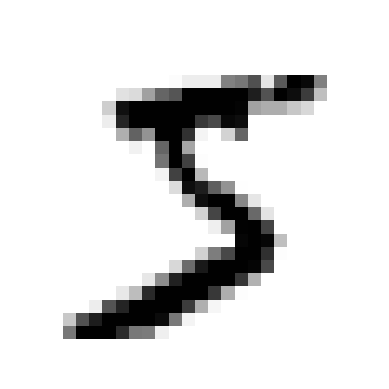

'5'

In [9]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

y[0]

In [10]:
y[0]

'5'

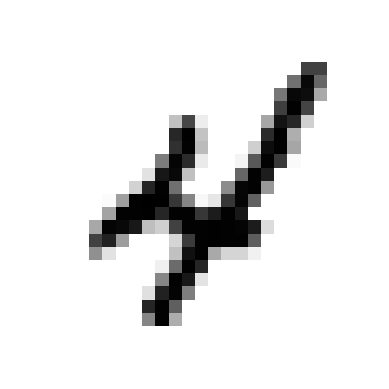

'4'

In [11]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[9]
plot_digit(some_digit)
plt.show()

y[9]

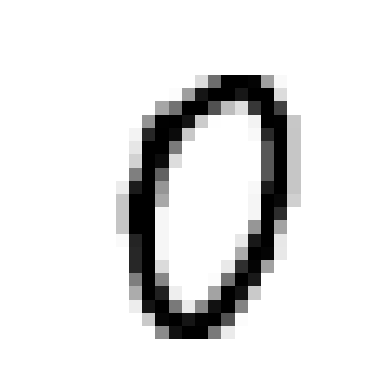

'0'

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[1000]
plot_digit(some_digit)
plt.show()

y[1000]



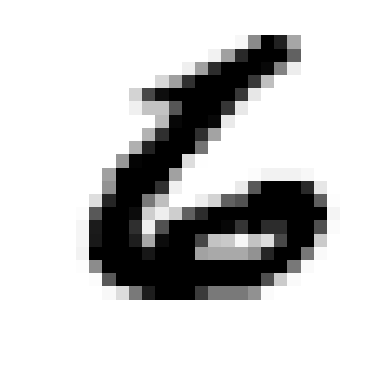

'6'

In [13]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[-1]
plot_digit(some_digit)
plt.show()

y[-1]

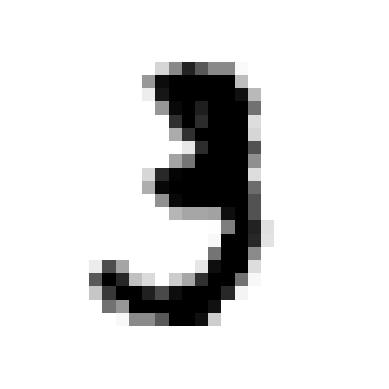

'3'

In [14]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[10]
plot_digit(some_digit)
plt.show()

y[10]

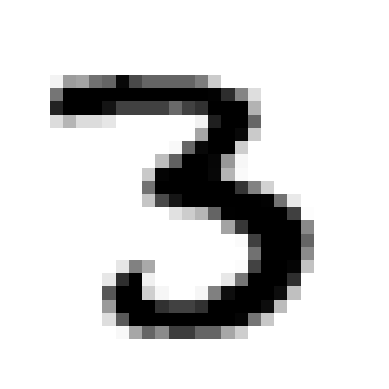

'3'

In [15]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[12]
plot_digit(some_digit)
plt.show()

y[12]

### Splitting the data

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

Let's now create  a 3-detector which only classifies 3 or not 3

In [17]:
y_train_3 = (y_train == '3')  # True for all 3s, False for all other digits
y_test_3 = (y_test == '3')

Let's start with stochastic gradient descent (SGD, or stochastic GD) classifier.

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

Making some predictions

In [19]:
sgd_clf.predict([X[12]])

array([ True])

In [20]:
sgd_clf.predict([X[1000]])

array([False])

In [21]:
sgd_clf.predict([X[10]])

array([ True])

In [22]:
sgd_clf.predict([X[222]])

array([False])

The classifier guesses that 2 images represents a 3 (True) while the other donot represent 3 (False). Looks like it
guessed right in these particular cases! Now, let’s evaluate this model’s
performance.

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.9496 , 0.9624 , 0.96275])

Well, it seems our 3-detector is doing very good fro the above accuracy, let's confirm that if the system really learns using a dummy classifier.

DummyClassifier is a simple baseline model that makes predictions using simple rules,
such as always predicting the most frequent class. It's useful for comparing performance
with more advanced classifiers to ensure your model is actually learning something meaningful.


In [24]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_3)
print(any(dummy_clf.predict(X_train)))

False


Well, it turns out the dummyClassifier isn't able to identify  any '3', but let's check the accuracy.

In [25]:
cross_val_score(dummy_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.89785, 0.8978 , 0.8978 ])

Woooow 😂 it cant even identify a single '3' but it has a cross val accuracy of almost 90% 👀

let's dive into  what happened

Turns out accuracy can be misleading when classes are imbalanced.
For example, if only 10% of images are 3s, always guessing "not 3" gives 90% accuracy — but it's useless.
Instead, we should use a confusion matrix to see how well the classifier handles each class.


## Confusion Matrix

A confusion matrix is a table that shows how well a classification model performs, by comparing the actual labels to the predicted labels.

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_3, y_train_pred)
cm

array([[53477,   392],
       [ 2113,  4018]], dtype=int64)

In [28]:
y_train_perfect_predictions = y_train_3  # pretend we reached perfection to better see how confusion matrix work
confusion_matrix(y_train_3, y_train_perfect_predictions)

array([[53869,     0],
       [    0,  6131]], dtype=int64)

## Precision and Recall

* **Precision**: The proportion of true positive results among all positive predictions. It answers, "Of all the items predicted as positive, how many were actually positive?"

* **Recall**: The proportion of true positive results among all actual positives. It answers, "Of all the actual positive items, how many did we correctly identify?"

* **F1 Score**: The harmonic mean of precision and recall. It balances both metrics, providing a single value to optimize when you care about both false positives and false negatives.


In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_3, y_train_pred)  # == 4018 / (392 + 4018)

# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.9111111111111111

In [30]:
recall_score(y_train_3, y_train_pred)

# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.655358016636764

In [31]:
from sklearn.metrics import f1_score

f1_score(y_train_3, y_train_pred)

# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7623565126648325

## Precision/Recall Trade-off

In [32]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([6800.90947939])

In [33]:
some_digit = X[12]

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([6800.90947939])

In [34]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [35]:
y_some_digit_pred

array([ True])

In [36]:
threshold = 7000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3,
                             method="decision_function")

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

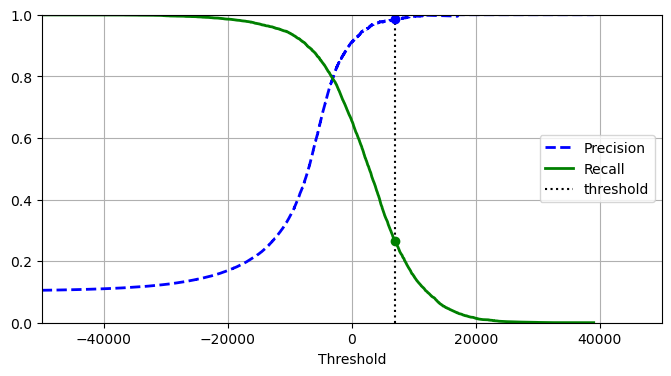

In [39]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

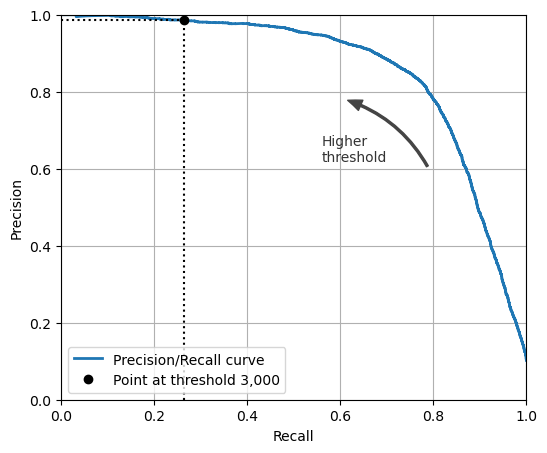

In [40]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [41]:
idx_for_95_precision = (precisions >= 0.95).argmax()
threshold_for_95_precision = thresholds[idx_for_95_precision]
threshold_for_95_precision

2081.553214151017

In [42]:
y_train_pred_95 = (y_scores >= threshold_for_95_precision)

In [43]:
precision_score(y_train_3, y_train_pred_95)

0.9500717360114778

In [44]:
recall_at_95_precision = recall_score(y_train_3, y_train_pred_95)
recall_at_95_precision

0.5400424074376121

## The ROC Curve

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

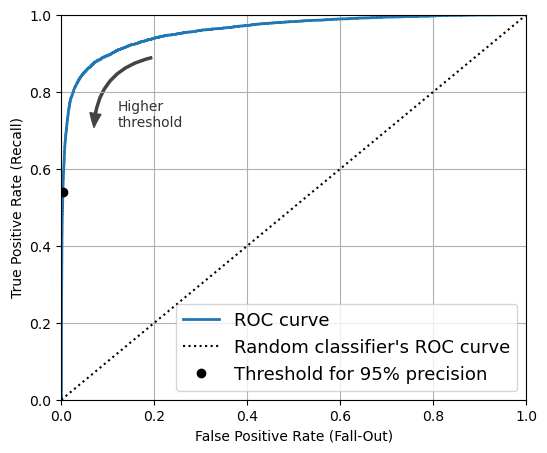

In [51]:
idx_for_threshold_at_95 = (thresholds <= threshold_for_95_precision).argmax()
tpr_95, fpr_95 = tpr[idx_for_threshold_at_95], fpr[idx_for_threshold_at_95]

plt.figure(figsize=(6, 5))  # extra code – not needed, just ?
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_95], [tpr_95], "ko", label="Threshold for 95% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_3, y_scores)

0.9599243001892759

Let’s now create a RandomForestClassifier, whose PR curve and F score we
can compare to those of the SGDClassifier:


In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3,
                                    method="predict_proba")

In [ ]:
y_probas_forest[:2]

In [ ]:
y_train_3[:2]

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_3, y_scores_forest)

In [ ]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

We could use `cross_val_predict(forest_clf, X_train, y_train_3, cv=3)` to compute `y_train_pred_forest`, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_3, y_train_pred_forest)

In [ ]:
roc_auc_score(y_train_3, y_scores_forest)

In [ ]:
precision_score(y_train_3, y_train_pred_forest)

In [ ]:
recall_score(y_train_3, y_train_pred_forest)

# Multiclass Classification